# Classificazione binaria

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')

In [ ]:

binary_cols = ['HLTHPLN1','MEDCOST','TOLDHI2','CVDINFR4',
            'CVDCRHD4','CVDSTRK3','ASTHMA3','CHCSCNCR','CHCOCNCR',
            'CHCCOPD1','HAVARTH3','ADDEPEV2','CHCKIDNY','VETERAN3',
            'INTERNET','QLACTLM2','USEEQUIP','BLIND','DECIDE',
            'DIFFWALK','DIFFDRES','DIFFALON','SMOKE100','EXERANY2','FLUSHOT6',
            'PNEUVAC3', 'HIVTST6', 'PERSDOC2', 'BPHIGH4'] 

nominal_cols = [
    'MARITAL','EMPLOY1','_RACE', '_BMI5CAT'
]

numeric_cols = [
    'PHYSHLTH','CHILDREN',
    'ALCDAY5', 'FRUITJU1',  'STRENGTH',
    'FRUIT1', 'FVBEANS','FVGREEN',
    'FVORANG','VEGETAB1'
]

ordinal = {
    'GENHLTH':       [1,2,3,4,5],       
    'CHECKUP1':      [1,2,3,4,5,6,7,8], 
    'CHOLCHK':       [1,2,3,4],         
    '_AGE_G':        [1,2,3,4,5,6],     
    '_PACAT1':       [1,2,3,4],         
    'EDUCA':         [1,2,3,4,5,6],     
    'INCOME2':       [1,2,3,4,5,6,7,8], 
}

# Nominali: stringa coerente
for col in nominal_cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].replace(['nan', 'None', '-9223372036854775808'], np.nan)

# Ordinali
for col in list(ordinal.keys()):
    df[col] = pd.to_numeric(df[col], errors='coerce')


df[binary_cols] = df[binary_cols].astype('Int64')

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213674 entries, 0 to 213673
Data columns (total 51 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GENHLTH   213480 non-null  float64
 1   PHYSHLTH  211979 non-null  float64
 2   HLTHPLN1  213570 non-null  Int64  
 3   PERSDOC2  213524 non-null  Int64  
 4   MEDCOST   213507 non-null  Int64  
 5   CHECKUP1  213063 non-null  float64
 6   BPHIGH4   213531 non-null  Int64  
 7   CHOLCHK   213049 non-null  float64
 8   TOLDHI2   213129 non-null  Int64  
 9   CVDINFR4  213232 non-null  Int64  
 10  CVDCRHD4  212736 non-null  Int64  
 11  CVDSTRK3  213424 non-null  Int64  
 12  ASTHMA3   213485 non-null  Int64  
 13  CHCSCNCR  213515 non-null  Int64  
 14  CHCOCNCR  213529 non-null  Int64  
 15  CHCCOPD1  213236 non-null  Int64  
 16  HAVARTH3  213336 non-null  Int64  
 17  ADDEPEV2  213428 non-null  Int64  
 18  CHCKIDNY  213294 non-null  Int64  
 19  DIABETE3  213674 non-null  object 
 20  MARI

ELIMINO LE RIGHE CON CLASSE = PREDIABETE


In [3]:
from sklearn.model_selection import train_test_split

df = df[df['DIABETE3'] != 'PreDiabetes'] #########

y_map = {'NoDiabetes': 0, 'Diabetes': 1}

df['DIABETE3'] = df['DIABETE3'].map(y_map)

# Definizione feature e target
X = df.drop(columns=['DIABETE3'])
y = df['DIABETE3']

# Split stratificato
X_train, X_test, y_train, y_test = train_test_split(
X, y, stratify=y, test_size=0.3, random_state=42
)

print(y_train.value_counts())
print(y_test.value_counts())

DIABETE3
0    112406
1     32780
Name: count, dtype: int64
DIABETE3
0    48174
1    14049
Name: count, dtype: int64


# SMOTE

🔍 Valutazione modelli:  25%|██▌       | 2/8 [05:37<14:39, 146.60s/it]/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depreca

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0        Random Forest  0.819080   0.640542  0.452776  0.530536  0.846516
1  Logistic Regression  0.758000   0.477881  0.776083  0.591525  0.844316
2             AdaBoost  0.798824   0.547680  0.625839  0.584157  0.841173
3        Decision Tree  0.746456   0.442573  0.473856  0.457681  0.649933
4                  KNN  0.677834   0.391324  0.768609  0.518608  0.766200
5             Bayesian  0.739527   0.449842  0.689048  0.544324  0.789219
6              XGBoost  0.825713   0.660209  0.469921  0.549045  0.857348
7             CatBoost  0.826195   0.662924  0.468334  0.548893  0.859398


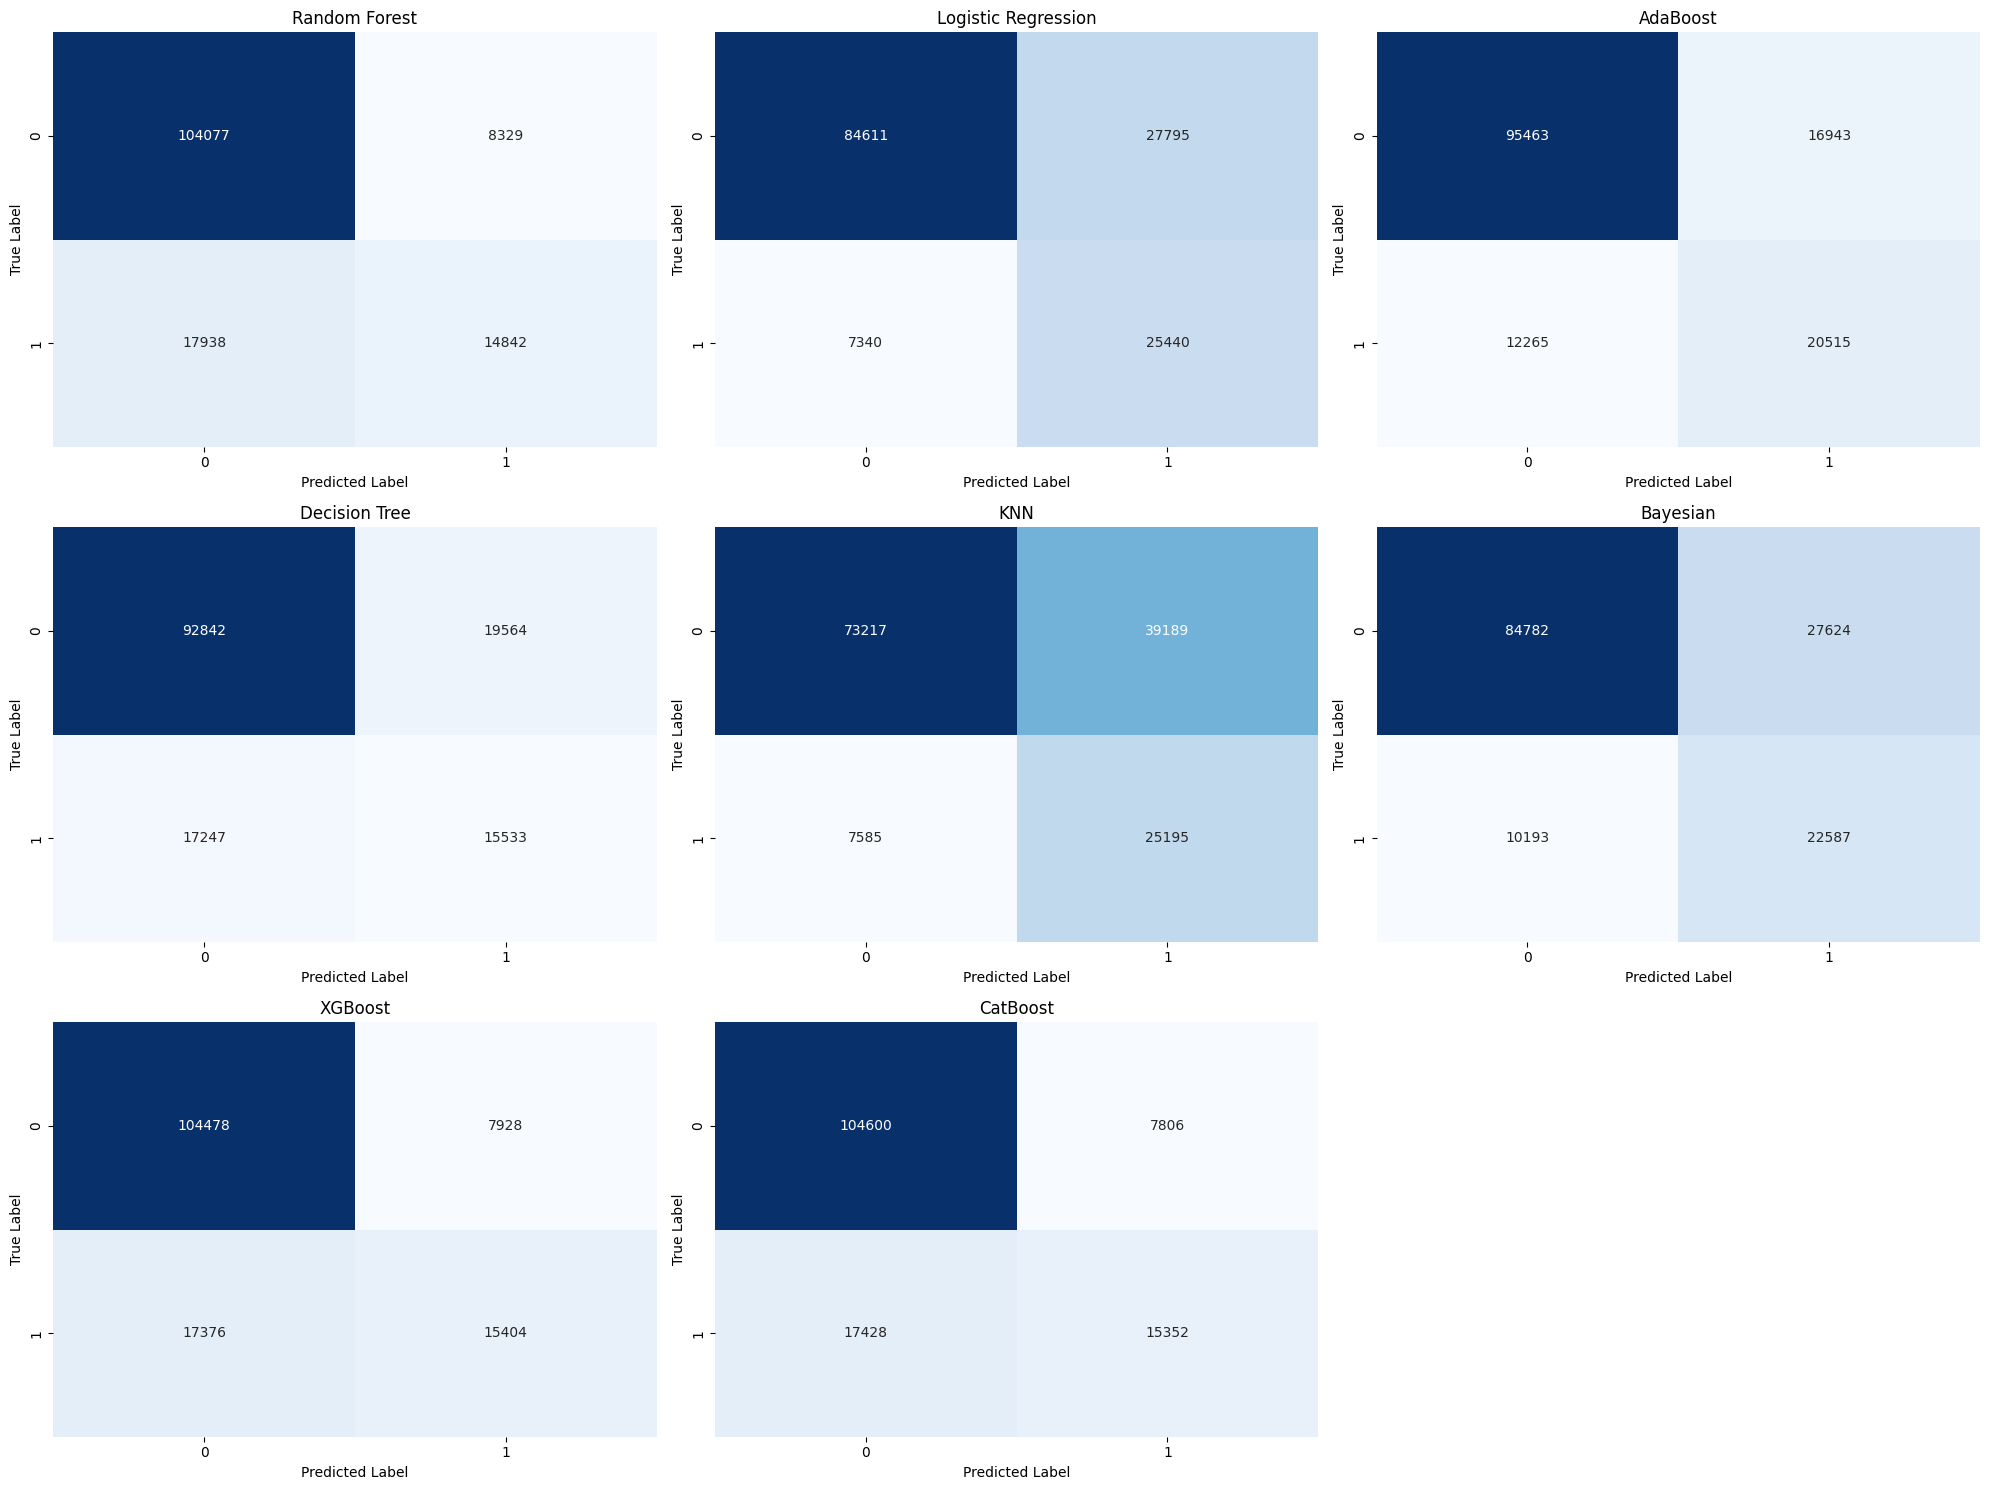

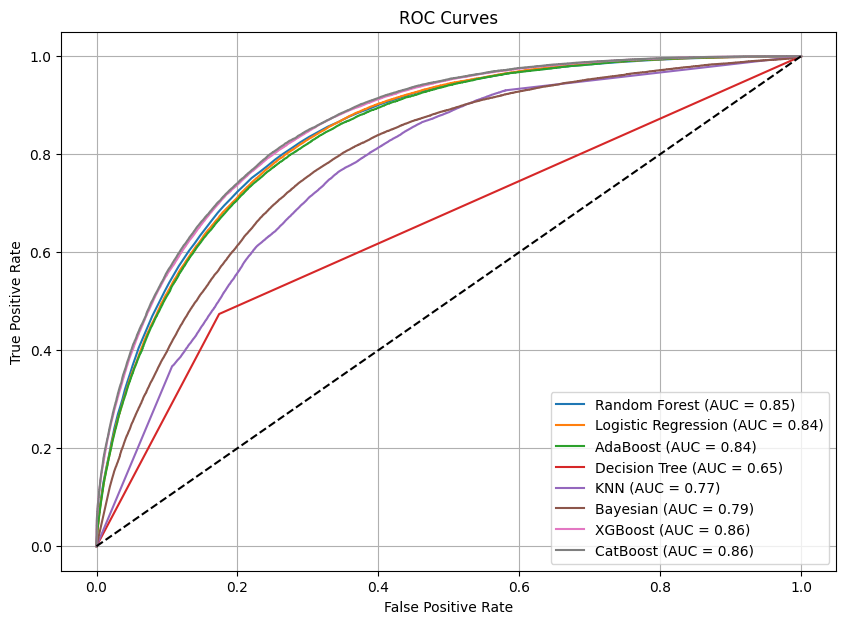

In [ ]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, roc_auc_score, roc_curve, auc)
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm  #  tqdm per barre di avanzamento

from prep.preprocessor import preprocessor
from prep.DiabetesFeatureEngineer import DiabetesFeatureEngineer
# === MODELLI ===
models = {
    'Random Forest': RandomForestClassifier(random_state=42,class_weight='balanced'),
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42,class_weight='balanced'),
    'KNN': KNeighborsClassifier(weights='distance'),
    'Bayesian': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# === STRATIFIED CV ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_scores = {}
conf_matrices = {}
roc_curves = {}
all_results = []

# === LOOP PER MODELLO CON TQDM ===
for model_name, model in tqdm(models.items(), desc="🔍 Valutazione modelli"):

    pipeline = Pipeline(steps=[
        ('feature_engineering', DiabetesFeatureEngineer()),
        ('preprocessing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    y_true = []
    y_pred = []
    y_prob = []

    # LOOP CON TQDM SUI FOLD
    for fold_idx, (train_idx, test_idx) in enumerate(tqdm(skf.split(X_train, y_train), total=5, desc=f"📂 CV {model_name}")):
        X_fold_train, y_fold_train = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_fold_test,  y_fold_test  = X_train.iloc[test_idx],  y_train.iloc[test_idx]

        pipeline.fit(X_fold_train, y_fold_train)

        y_pred_fold = pipeline.predict(X_fold_test)
        y_prob_fold = pipeline.predict_proba(X_fold_test)[:, 1]

        y_true.extend(y_fold_test)
        y_pred.extend(y_pred_fold)
        y_prob.extend(y_prob_fold)

    # === METRICHE ===
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    
    
    all_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })
    
    
    conf_matrix = confusion_matrix(y_true, y_pred)
    conf_matrices[model_name] = conf_matrix

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_curves[model_name] = (fpr, tpr)


# === RISULTATI ===
results_df = pd.DataFrame(all_results)
print(results_df)



# === CONFUSION MATRICES ===
num_models = len(models)
cols = 3
rows = num_models // cols + int(num_models % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for idx, (model_name, conf_matrix) in enumerate(conf_matrices.items()):
    ax = axes[idx]
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

for idx in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


# === ROC CURVES ===
plt.figure(figsize=(10, 7))
for model_name, (fpr, tpr) in roc_curves.items():
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()


In [5]:

from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt


from prep.preprocessor import preprocessor
from prep.DiabetesFeatureEngineer import DiabetesFeatureEngineer


pipeline = Pipeline(steps=[
        ('feature_engineering', DiabetesFeatureEngineer()),
        ('preprocessing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42))
    ])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'ROC AUC': [roc_auc]
})
results


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.756312,0.47586,0.78155,0.591547,0.765251


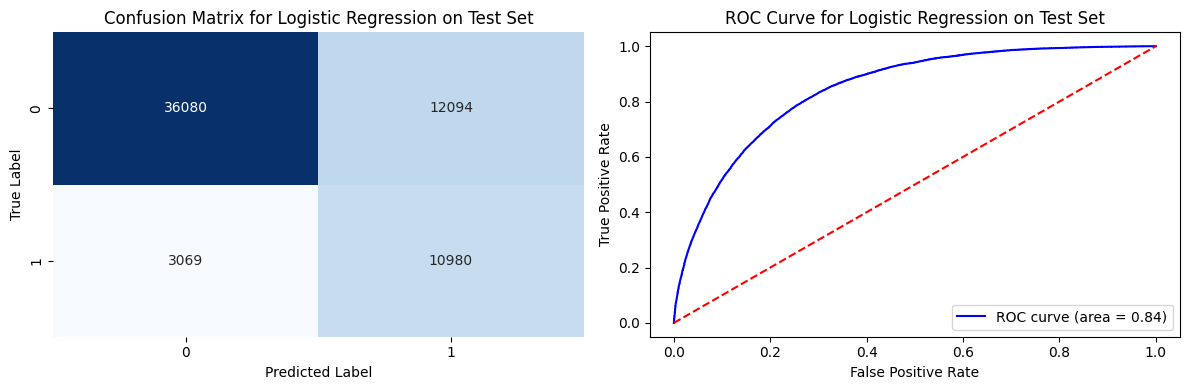

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)


fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Mtrice di confusione sul primo subplot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title(f'Confusion Matrix for Logistic Regression on Test Set')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Roc curve sul secondo subplot
axes[1].plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc_value:.2f})')
axes[1].plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonale
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title(f'ROC Curve for Logistic Regression on Test Set')
axes[1].legend(loc="lower right")


plt.tight_layout()
plt.show()

# GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#  StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100], # Regularization strength
    'model__solver': ['lbfgs', 'liblinear'], # Solver for optimization
    'model__class_weight': ['balanced', None], # Class weight
}

scoring = {
    'roc_auc': 'roc_auc',
    'recall': 'recall'
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring,refit='recall', cv=skf, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best recall: ", grid_search.cv_results_['mean_test_recall'].max())
print("Best ROC AUC: ", grid_search.cv_results_['mean_test_roc_auc'].max())

Best parameters found:  {'model__C': 0.01, 'model__class_weight': 'balanced', 'model__solver': 'liblinear'}
Best recall:  0.777425259304454
Best ROC AUC:  0.8426033058249839


In [ ]:
best_params = {
    'model__C': 0.01, # Regularization strength
    'model__solver': 'liblinear', # Solver for optimization
    'model__class_weight': 'balanced' # Class weigh
}


best_pipeline = Pipeline(steps=[
        ('feature_engineering', DiabetesFeatureEngineer()),
        ('preprocessing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42))
    ])


best_pipeline.fit(X_train, y_train)


y_pred = best_pipeline.predict(X_test)
y_prob = best_pipeline.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


results = pd.DataFrame({
    'Model': ['Linear Regression'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'ROC AUC': [roc_auc]
})
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Linear Regression,0.756312,0.47586,0.78155,0.591547,0.765251


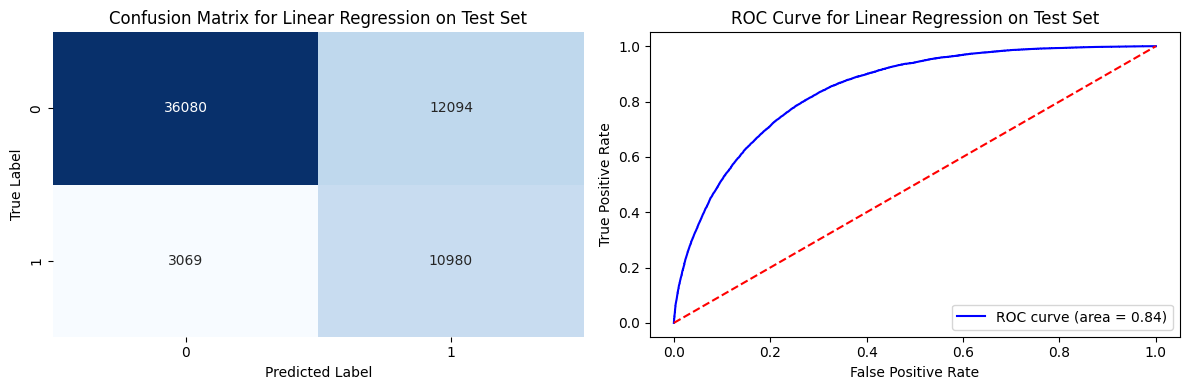

In [ ]:
# matrice di confusione e roc curve
cm = confusion_matrix(y_test, y_pred)
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)


fig, axes = plt.subplots(1, 2, figsize=(12, 4))  


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title(f'Confusion Matrix for Linear Regression on Test Set')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')


axes[1].plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc_value:.2f})')
axes[1].plot([0, 1], [0, 1], color='red', linestyle='--')  
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title(f'ROC Curve for Linear Regression on Test Set')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
binary_cols = ['HLTHPLN1','MEDCOST','TOLDHI2','CVDINFR4',
            'CVDCRHD4','CVDSTRK3','ASTHMA3','CHCSCNCR','CHCOCNCR',
            'CHCCOPD1','HAVARTH3','ADDEPEV2','CHCKIDNY','VETERAN3',
            'INTERNET','QLACTLM2','USEEQUIP','BLIND','DECIDE',
            'DIFFWALK','DIFFDRES','DIFFALON','SMOKE100','EXERANY2','FLUSHOT6',
            'PNEUVAC3', 'HIVTST6', 'PERSDOC2', 'BPHIGH4'] 

nominal_cols = [
    'MARITAL','EMPLOY1','_RACE', '_BMI5CAT'
]

numeric_cols = [
    'PHYSHLTH','CHILDREN',
    'ALCDAY5', 'FRUITJU1',  'STRENGTH',
    
]

ordinal = {
    'GENHLTH':       [1,2,3,4,5],       
    'CHECKUP1':      [1,2,3,4,5,6,7,8], 
    'CHOLCHK':       [1,2,3,4],         
    '_PACAT1':       [1,2,3,4],
    'EDUCA':         [1,2,3,4,5,6],    
    'INCOME2':       [1,2,3,4,5,6,7,8], 
    'Sedentary':     [0,1,2],         
    'RiskyBehavior': [0,1,2],         
    'LowAccess':     [0,1,2],         
    
}

# Feature Importance

In [ ]:
# Estraggo il modello dalla pipeline
model = best_pipeline.named_steps['model']
importance = np.abs(model.coef_)[0]  # uso il valore assoluto del coefficiente
# Estraggo il preprocessor
preprocessor = best_pipeline.named_steps['preprocessing']
# Nomi delle feature numeriche 
numerical_features = numeric_cols
# Nomi delle feature binarie 
binary_features = binary_cols
#Nomi delle feature nominali 
onehot_encoder = preprocessor.named_transformers_['nom'].named_steps['onehot']
nominal_feature_names = onehot_encoder.get_feature_names_out(nominal_cols)
#  Nomi delle feature ordinali 
ordinal_features = list(ordinal.keys())
#  Combino tutti i nomi delle feature nell’ordine usato da ColumnTransformer
all_feature_names = (
    numerical_features +     # num
    binary_features +        # bin
    list(nominal_feature_names) +  # nom
    ordinal_features         # ord
)

#  Verifico  lunghezza
assert len(all_feature_names) == len(importance), "Mismatch tra feature names e importanze!"

# Creo DataFrame con feature importance
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)


feature_importance_df.head(25)


,Feature,Importance
0,_BMI5CAT_1.0,1.175089
1,AGE_GROUP_Young,0.994092
2,BPHIGH4,0.763472
3,_BMI5CAT_4.0,0.701080
4,GENHLTH,0.681720
5,CHOLCHK,0.631822
6,PNEUVAC3,0.609406
7,MEDCOST,0.593065
8,TOLDHI2,0.555843
9,_BMI5CAT_2.0,0.538180


In [ ]:

import pickle

with open('diabetes_classifier.pkl', 'wb') as model_file:
    pickle.dump(best_pipeline, model_file)